### Disjoint-set/Union-find forest
Find(x): find the root/cluster-id of x
Union(x, y:merge two clusters
Check whether two elements are in the same set or not in O(1).
Find: O(a(n))* = O(1)
Union: O(a(n))* = O(1)
Space: O(n)

Without optimization: Find(n)
Two key optimizations:
1) Path compression: make tree flat （在find 时候做）
在find 的时候，一边find一边把改节点的parent 一直指向最开始的根结点，这样子tree 就flatten了
在path compression，就只要操作一次o（n），但是操作完，以后其他操作都是o（1）， 所以平均是o（1）
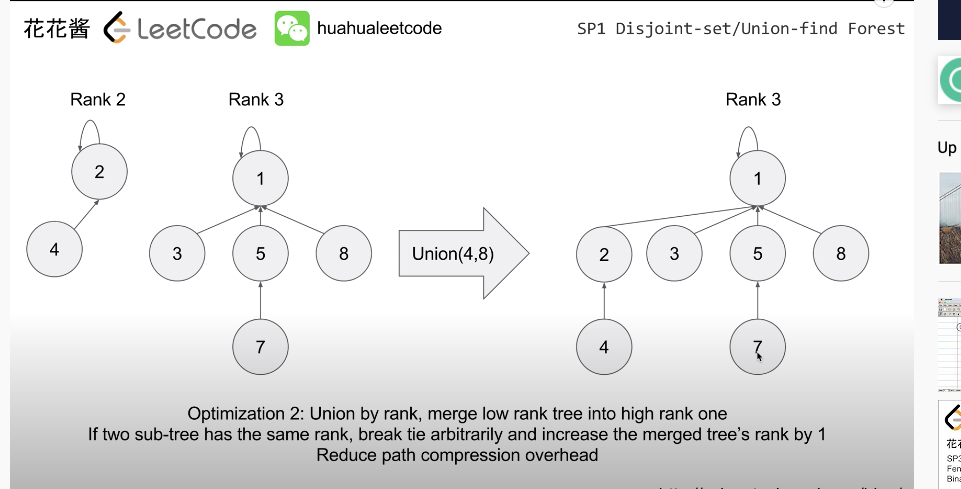
2) Union by rank: merge low rank tree to high rank one
rank可以理解是混乱度或者说平均长度
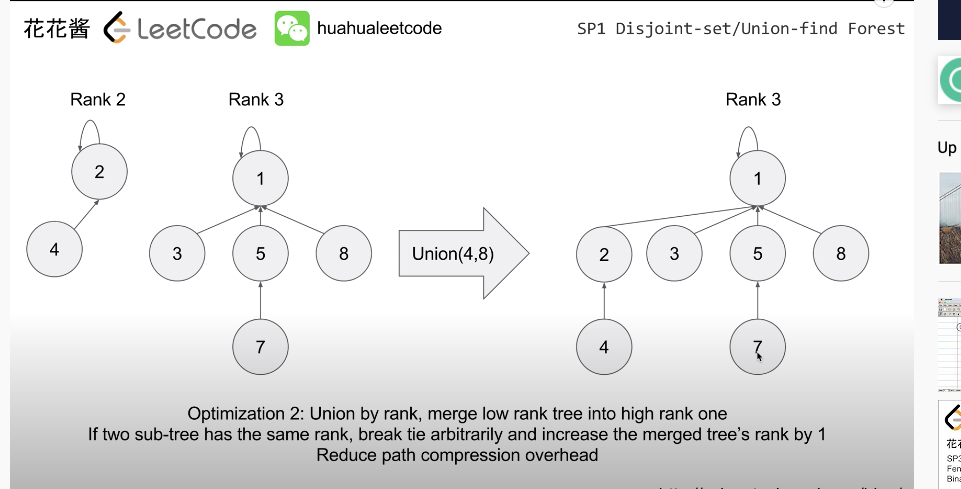
我们把rank低的merge到rank高的，这样在做path compression的overhead 就比较低，因为更少的node需要做path compression
在merge 两个component （4， 8），首先会先find 4的根结点和8的根结点，然后把rank比较低的节点merge到高的节点。
这个例子是把2的节点merge到1，因为1的rank高


In [ ]:
class DSU: # disjoint set union
    def __init__(self, n):
        self.parents = [i for i in range(1, n + 1)]
        self.rank = [0 for _ in range(n)]
        
    def find(self, x):
        if x != self.parents[x]:
            # path compresssion, it will make all parents of x to point to the root parent
            self.parents[x] = find(self.parents[x])
        return self.parents[x]
    
    def union(x, y):
        px, py = self.find(x), self.find(y) # if x, y has not done path compression, then it will do in this step
        if self.ranks[px] > self.ranks[py]: self.parents[py] = px
        if self.ranks[px] < self.ranks[py]: self.parents[px] = py
        if self.ranks[px] == self.ranks[py]:
            self.parents[py] = px
            self.ranks[px] += 1
        
            

In [2]:
# 684. Redundant Connection
from typing import List
class DSU(object):
    def __init__(self):
        self.par = list(range(1001))
        self.rnk = [0] * 1001
    # get the root of x
    def find(self, x):
        # compress the path during traversal
        if self.par[x] != x:
            self.par[x] = self.find(self.par[x])
        return self.par[x]
    # merge sets that contains u and v
    # return true if merged, false, if u and v are already in one set
    def union(self, x, y):
        xr, yr = self.find(x), self.find(y)
        if xr == yr:
            return False
        # merge low rank tree into high rank tree
        if self.rnk[xr] < self.rnk[yr]:
            self.par[xr] = yr
        elif self.rnk[xr] > self.rnk[yr]:
            self.par[yr] = xr
        else:
            self.par[yr] = xr
            self.rnk[xr] += 1
        return True

class Solution(object):
    def findRedundantConnection(self, edges):
        dsu = DSU()
        for edge in edges:
            if not dsu.union(edge[0], edge[1]):
                return edge
s = Solution()
l = [[1,2], [1,3], [2,3]]
print(s.findRedundantConnection(l))

# Time complexity: ~O(N), N is the number of vertices (number of edges) in the graph
# space complexity: O(N). The current construction of the graph (embedded in dsu structure) has at most N nodes

[2, 3]


In [ ]:
# 305. Number of Islands II: https://leetcode.com/problems/number-of-islands-ii/
class Solution:
    def numIslands2(self, m: int, n: int, positions: List[List[int]]) -> List[int]:
        class DSU(object):
            def __init__(self, length):
                self.par = list(range(length))
                self.isLand = [False] * length
                self.rank = [1] * length
                self.count = 0

            def find(self, x):
                if self.par[x] != x:
                    self.par[x] = self.find(self.par[x])
                return self.par[x]

            def union(self, x, y):
                px, py = self.find(x), self.find(y)
                if px == py:
                    return False
                if self.rank[px] > self.rank[py]:
                    self.par[py] = px
                elif self.rank[px] < self.rank[py]:
                    self.par[px] = py
                else:
                    self.par[py] = px
                    self.rank[py] += 1
                self.count -= 1
                return True

            def addLand(self, x):
                self.isLand[x] = True
                self.count += 1

        def index(x, y):
            return x * n + y

        dsu = DSU(m * n)
        res = list()
        p_set = set()
        for p in positions:
            x, y = p[0], p[1]
            if (x, y) in p_set: 
                res.append(dsu.count)
                continue
            p_set.add((x, y))
            dsu.addLand(index(x, y))
            if x > 0 and dsu.isLand[index(x - 1, y)]:
                dsu.union(index(x, y), index(x - 1, y))
            if x < m - 1 and dsu.isLand[index(x + 1, y)]:
                dsu.union(index(x, y), index(x + 1, y))
            if y > 0 and dsu.isLand[index(x, y - 1)]:
                dsu.union(index(x, y), index(x, y - 1))
            if y < n - 1 and dsu.isLand[index(x, y + 1)]:
                dsu.union(index(x, y), index(x, y + 1))
            res.append(dsu.count)
        return res
            
